<a href="https://colab.research.google.com/github/KZ1101/Rushian/blob/main/fisher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

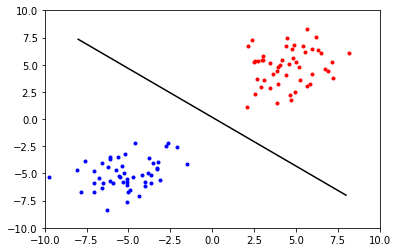

w = [[-0.03117017]
 [-0.0347724 ]] 



In [1]:
#coding: utf-8
# url (https://qiita.com/pira/items/4c84399671be2cb598e4)

import numpy as np
import matplotlib.pyplot as plt

DIM = 2 #データの次元数

#直線の式
def f(x, a, b):
    return a*x+b

#図示
def plot(cls1, cls2, line=None):
    x,y = cls1.T
    plt.plot(x, y, 'bo', ms=3, label='class1')
    x, y = cls2.T
    plt.plot(x, y, 'ro', ms=3, label='class2')

    if not (line is None):
        plt.plot(line[0], line[1], 'k-', ms=5)

    plt.xlim(-10,10)
    plt.ylim(-10,10)

    plt.show()

def fisher(cls1, cls2):
    #リストからnp.arrayに変換（行列の転置や逆行列を扱うため）
    cls1 = np.array(cls1)
    cls2 = np.array(cls2)

    #各クラスの平均値
    mean1 = np.mean(cls1, axis=0)
    mean2 = np.mean(cls2, axis=0)

    #総クラス内共分散行列
    sw = np.zeros((DIM,DIM))
    for xn in cls1:
        xn = xn.reshape(DIM,1)
        mean1 = mean1.reshape(DIM,1)
        sw += np.dot((xn-mean1),(xn-mean1).T)
    for xn in cls2:
        xn = xn.reshape(DIM,1)
        mean2 = mean2.reshape(DIM,1)
        sw += np.dot((xn-mean2),(xn-mean2).T)

    #総クラス内共分散行列の逆行列
    sw_inv = np.linalg.inv(sw)

    #wを求める
    w = np.dot(sw_inv,(mean1-mean2))

    #決定境界直線を図示する
    mean = (mean1 + mean2)/2 #平均値の中点
    a = -w[0]/w[1] #wと直交する
    b = a*mean[0]+mean[1]
    x = np.linspace(-8, 8, 1000)
    y = f(x,a,b)

    plot(cls1, cls2, (x,y))

    return w

if __name__ == '__main__':
    #テスト用2次元データ
    cov = [[3,1],[1,3]] #共分散
    cls1 = np.random.multivariate_normal([-5,-5], cov, 50)
    cls2 = np.random.multivariate_normal([5,5], cov, 50)

    #fisherで線形変換ベクトルwを求める
    w = fisher(cls1, cls2)
    print('w =', w, '\n')